In [1]:
!pwd

/Users/ashish1610dhiman/gatech_projects/time_series_practice/notebooks/ashish


In [2]:
!ls

zsh:1: command not found: ls


In [3]:
import matplotlib.pyplot as plt
# import matplotlib
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels

import scipy
from scipy.stats import pearsonr

In [4]:
# matplotlib.rcParams['figure.figsize'] = [12, 5]

### Read Data

In [5]:
bond_yields = pd.read_csv("../../data/us_10year_bonds.csv")
bond_yields.shape

(15908, 2)

In [6]:
bond_yields.head()

,DATE,DGS10
0,1962-01-02,4.06
1,1962-01-03,4.03
2,1962-01-04,3.99
3,1962-01-05,4.02
4,1962-01-08,4.03


In [7]:
bond_yields.index = pd.to_datetime(bond_yields.DATE)

In [8]:
(bond_yields["DGS10"]==".").sum()

678

In [9]:
bond_yields = bond_yields.loc[bond_yields["DGS10"]!="."]
bond_yields.shape

(15230, 2)

In [10]:
bond_yields["DGS10"] = pd.to_numeric(bond_yields["DGS10"])

<AxesSubplot: xlabel='DATE'>

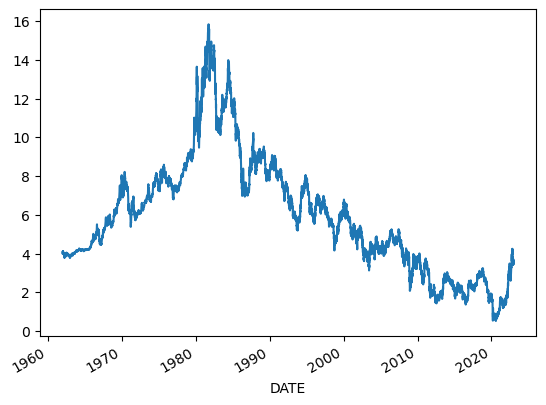

In [11]:
bond_yields["DGS10"].plot()

<AxesSubplot: xlabel='DATE'>

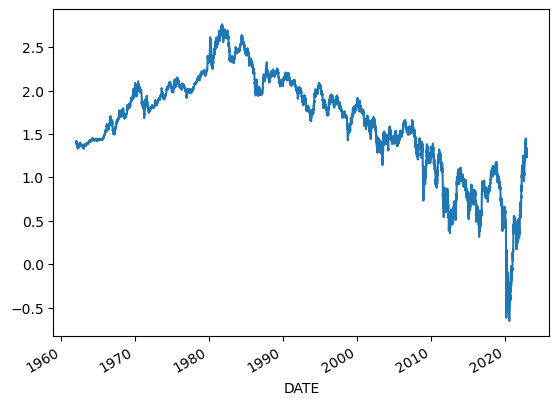

In [12]:
np.log(bond_yields["DGS10"]).plot()

In [13]:
bond_yields_2000 = bond_yields["2000":]

### Autocorrelation

In [14]:
bond_yields["DGS10"].autocorr(1),bond_yields["DGS10"].autocorr(100)

(0.999762654441149, 0.969781190415487)

In [15]:
bond_yields_2000["DGS10"].autocorr(1),bond_yields_2000["DGS10"].autocorr(100)

(0.9990667944809417, 0.9087031567187603)

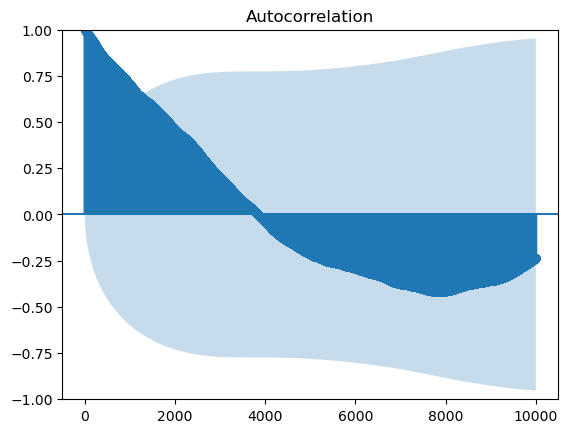

In [32]:
plot_acf(bond_yields["DGS10"], lags = 10000);

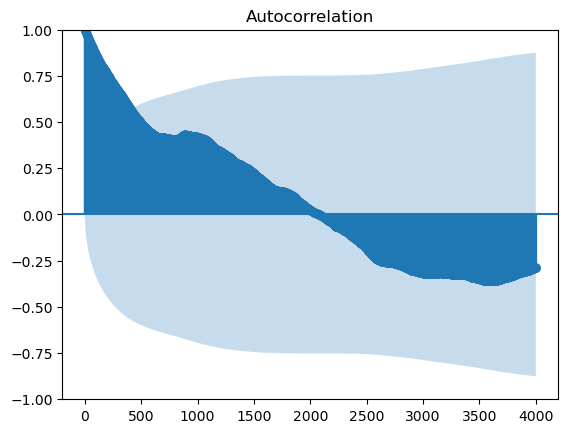

In [31]:
plot_acf(bond_yields_2000["DGS10"], lags = 4000);

/Users/ashish1610dhiman/opt/anaconda3/envs/time_series_practice/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


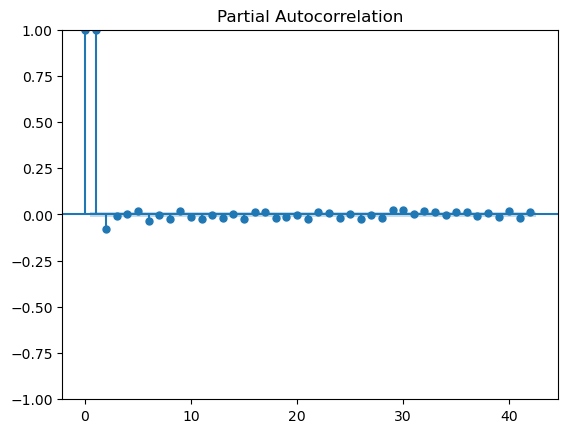

In [33]:
plot_pacf(bond_yields["DGS10"]);

### Models

<AxesSubplot: xlabel='DATE'>

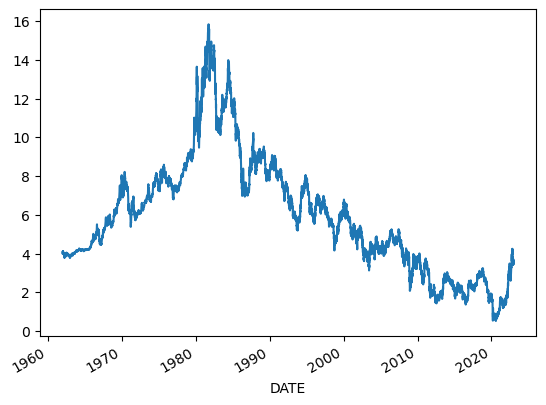

In [19]:
bond_yields["DGS10"].plot()

<AxesSubplot: xlabel='DATE'>

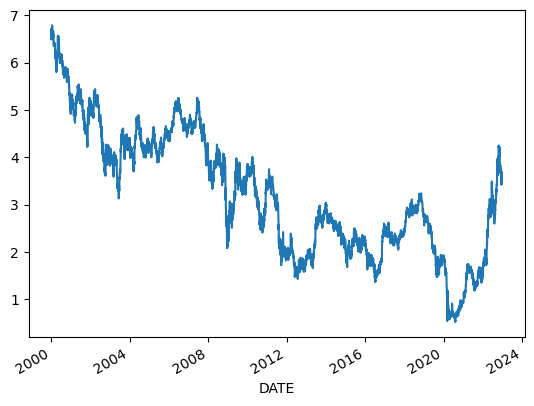

In [20]:
bond_yields_2000["DGS10"].plot()

In [39]:
# smooth trend model without seasonal or cyclical components
model1 = {
    'level': 'smooth trend', 'cycle': True, 'stochastic_cycle': True
}

model2 = {
    'level': 'local linear trend', 'cycle': True, 'stochastic_cycle': True
}

model3 = {
    'level': 'irregular', 'cycle': True, 'stochastic_cycle': True
}

model4 = {
    'level': 'random walk with drift', 'cycle': True, 'stochastic_cycle': True,  
}


In [53]:
def ad_plot_model(model_dict):
    gcag_mod = sm.tsa.UnobservedComponents(bond_yields_2000["DGS10"], **model_dict);
    gcag_res = gcag_mod.fit(disp= False);
    y_hat = gcag_res.predict()
    y_true = bond_yields_2000["DGS10"]
    rmse = np.mean((y_true-y_hat)**2)**0.5
    print (rmse)
    return (gcag_res.plot_components(figsize=(15, 9)))

/Users/ashish1610dhiman/opt/anaconda3/envs/time_series_practice/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0.1311159605757287


/Users/ashish1610dhiman/opt/anaconda3/envs/time_series_practice/lib/python3.9/site-packages/statsmodels/tsa/statespace/structural.py:1738: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


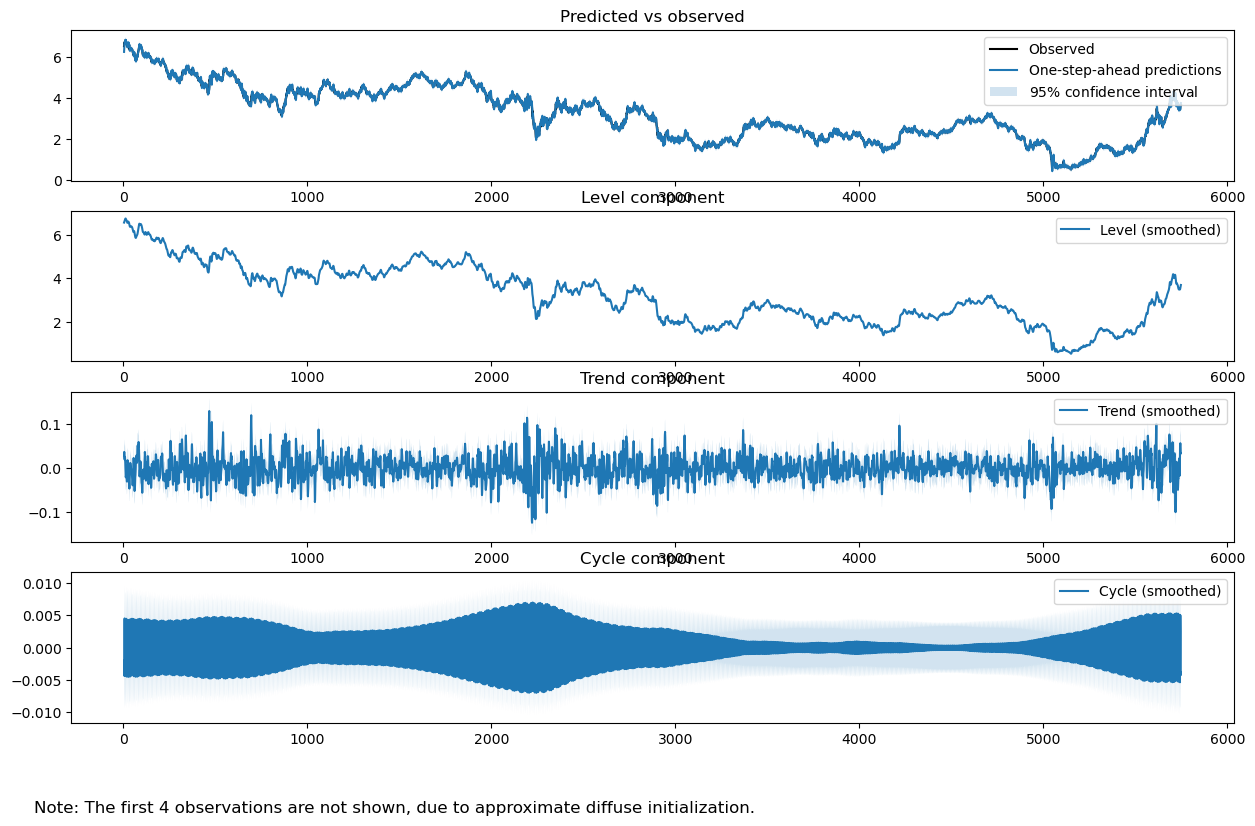

In [55]:
ad_plot_model(model1);

/Users/ashish1610dhiman/opt/anaconda3/envs/time_series_practice/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0.12699970932622973


/Users/ashish1610dhiman/opt/anaconda3/envs/time_series_practice/lib/python3.9/site-packages/statsmodels/tsa/statespace/structural.py:1738: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


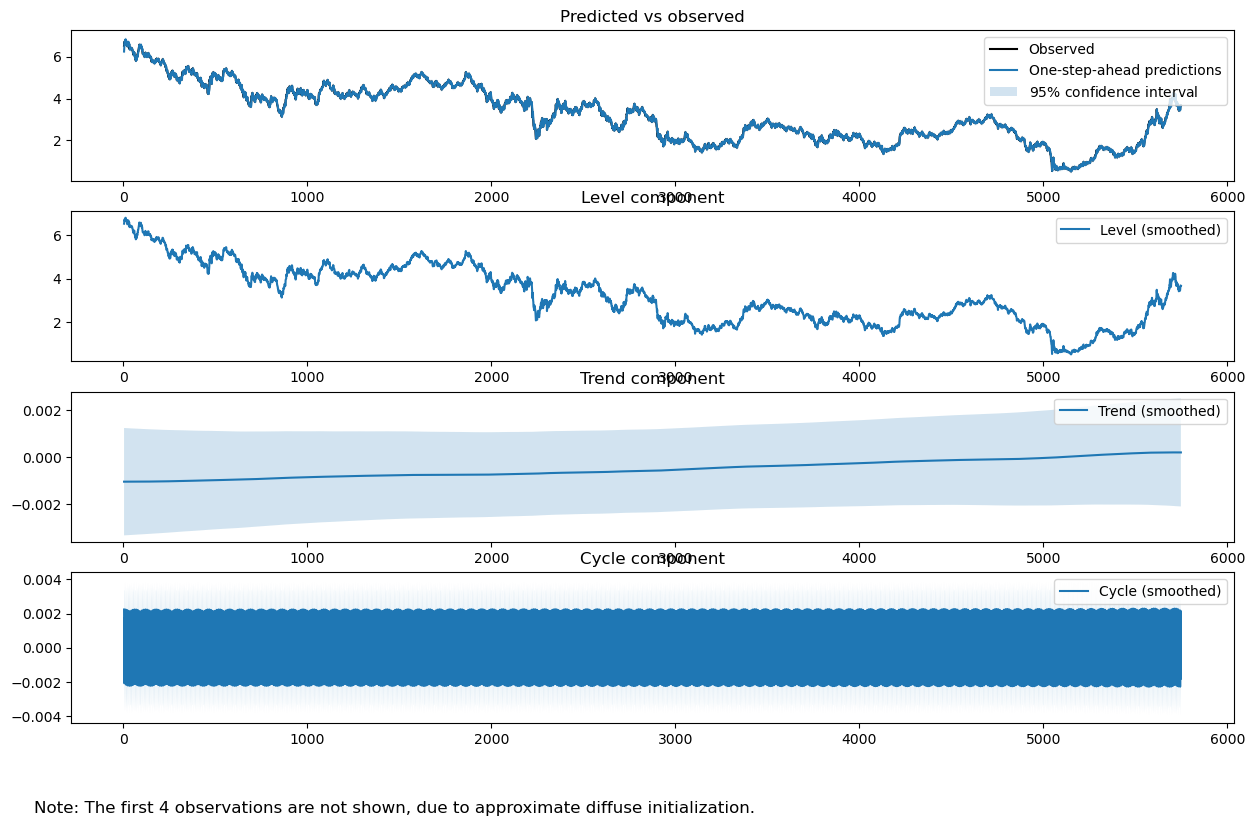

In [58]:
ad_plot_model(model2);

/Users/ashish1610dhiman/opt/anaconda3/envs/time_series_practice/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ashish1610dhiman/opt/anaconda3/envs/time_series_practice/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.10419477779738605


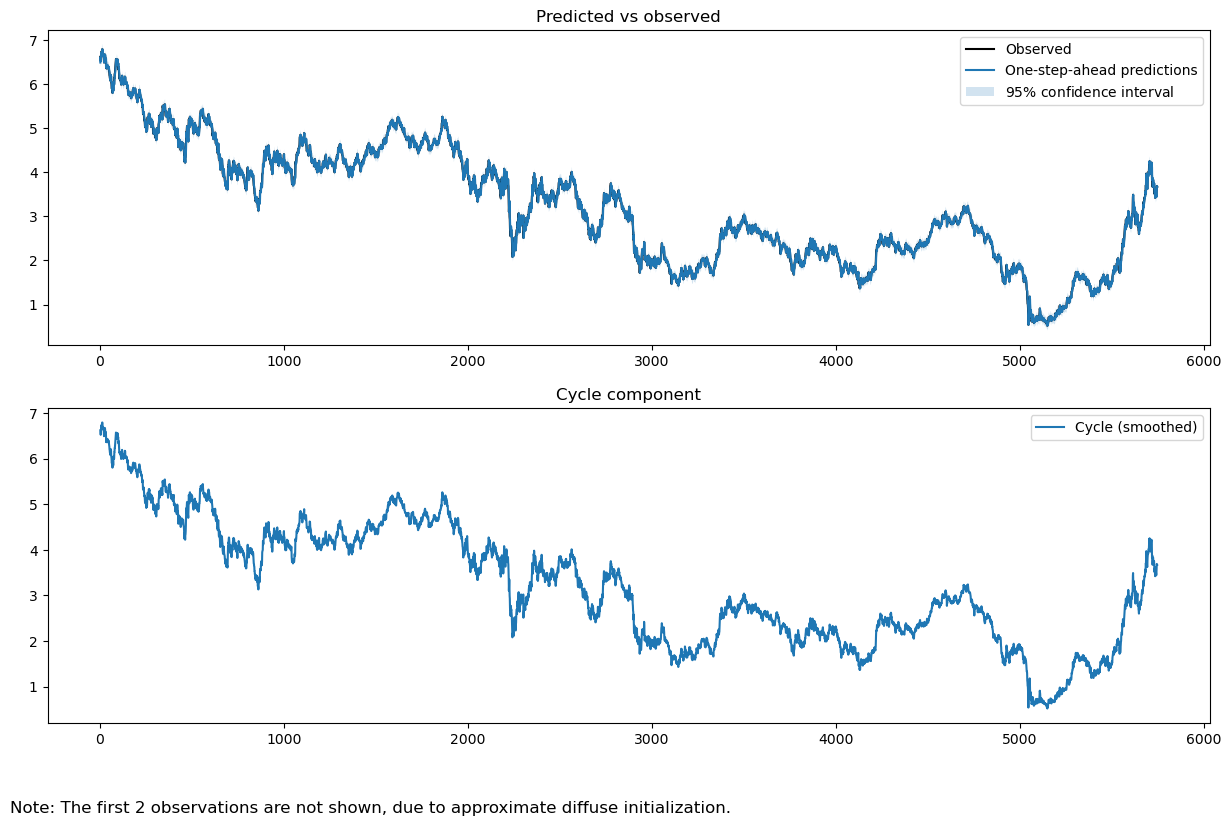

In [56]:
ad_plot_model(model3);

/Users/ashish1610dhiman/opt/anaconda3/envs/time_series_practice/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0.13094471064297633


/Users/ashish1610dhiman/opt/anaconda3/envs/time_series_practice/lib/python3.9/site-packages/statsmodels/tsa/statespace/structural.py:1738: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


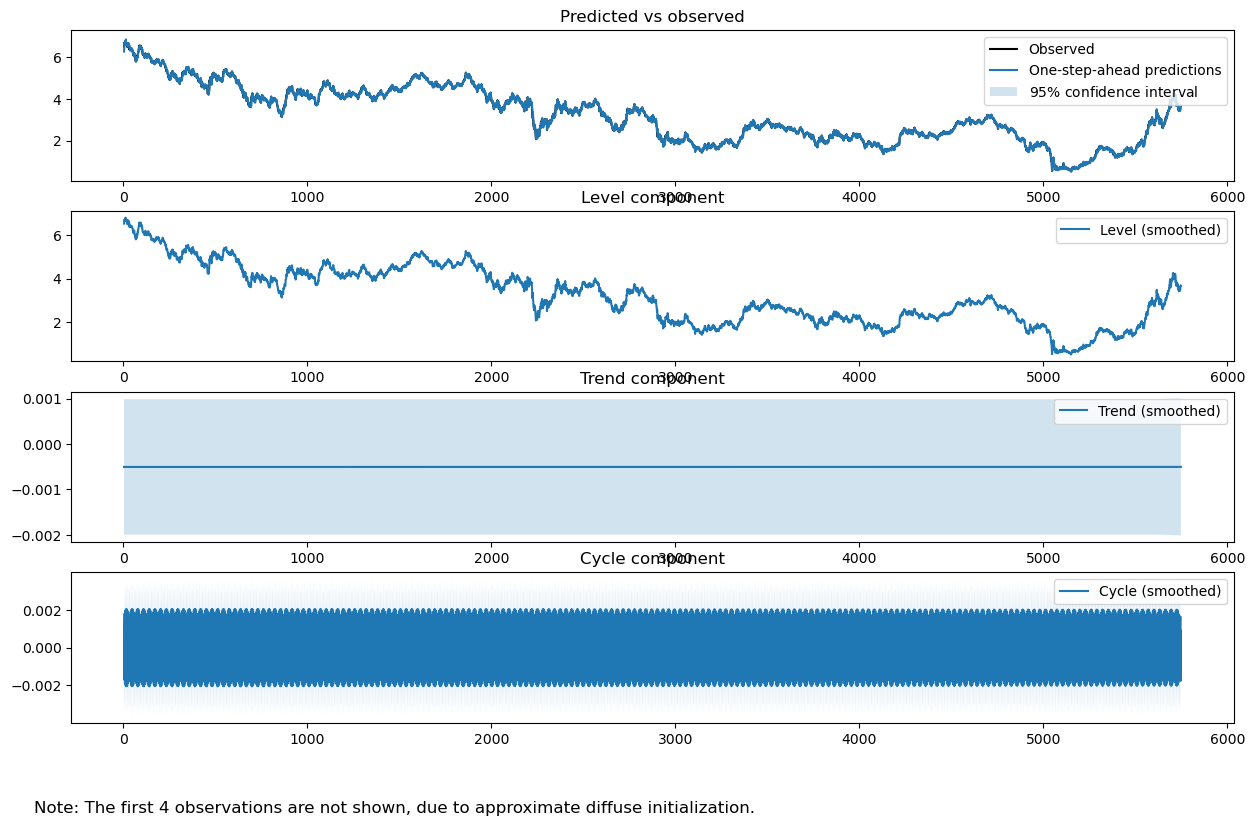

In [57]:
ad_plot_model(model4);

/Users/ashish1610dhiman/opt/anaconda3/envs/time_series_practice/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ashish1610dhiman/opt/anaconda3/envs/time_series_practice/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.10419477779738605


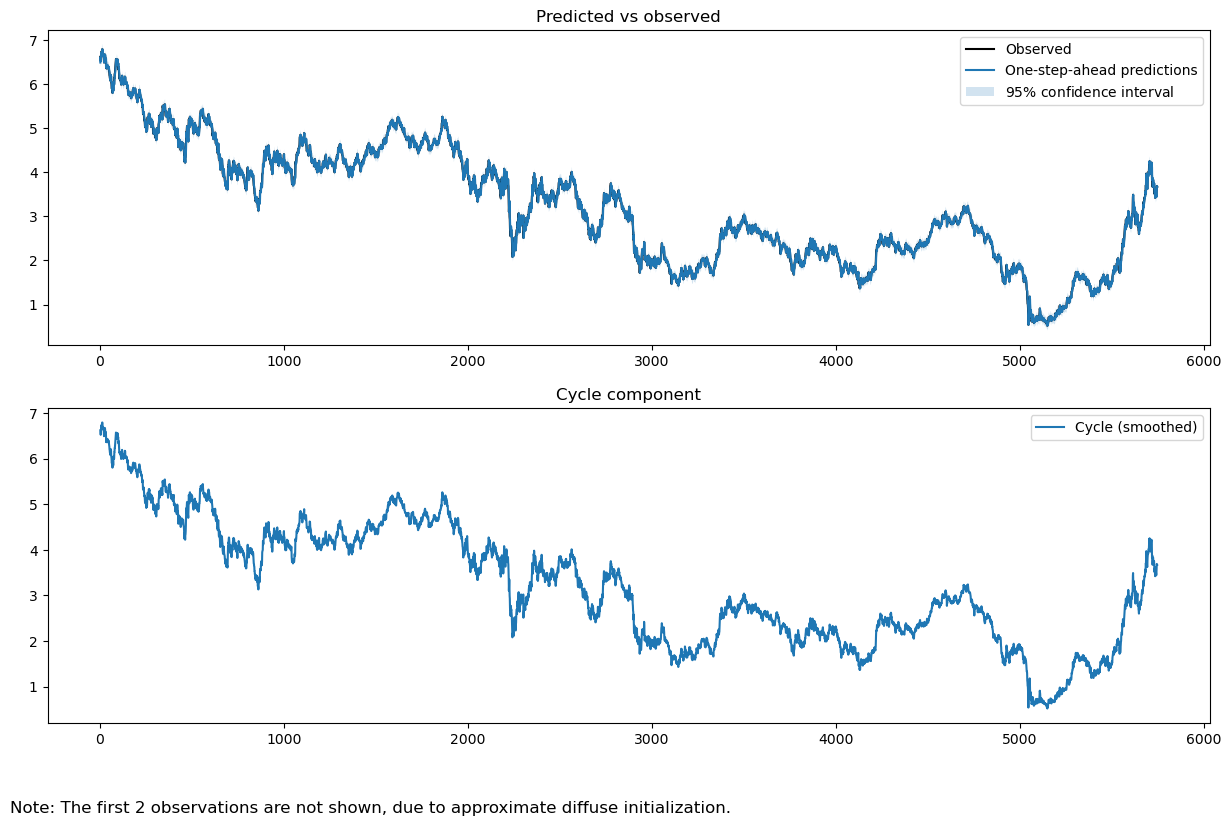

In [72]:
model3a = {
    'level': 'irregular', 'cycle': True, 'stochastic_cycle': True
}

ad_plot_model(model3a);

### Null Model

In [85]:
y_true = bond_yields_2000["DGS10"]
y_hat = y_true.iloc[1:]
len(y_true),len(y_hat)

(5748, 5747)

In [87]:
rmse = np.mean((y_true[:-1].values-y_hat.values)**2)**0.5
rmse

0.057660285670363784